# Football Match Outcome Prediction: Project
# Milestone 1: EDA and Data Cleaning

In [83]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


The football dataset I am working with includes the result of each game from the biggest leagues in the world since 1990.

First, it will be beneficial to explore the dataset and look for any unexpected and null values for each feature.

So let's load in the dataset for the 2020/21 English Premier League:

In [7]:
year = 2020
pl_results = pd.read_csv(f"Football-Dataset/premier_league/Results_{year}_premier_league.csv")
pl_results_initial = pd.read_csv(f"Football-Dataset/premier_league/Results_{year}_premier_league.csv")

pl_results

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Liverpool,Norwich City,4-1,https://www.besoccer.com/match/liverpool/norwi...,2020,1,premier_league
1,West Ham,Man. City,0-5,https://www.besoccer.com/match/west-ham-united...,2020,1,premier_league
2,AFC Bournemouth,Sheffield United,1-1,https://www.besoccer.com/match/afc-bournemouth...,2020,1,premier_league
3,Burnley,Southampton,3-0,https://www.besoccer.com/match/burnley-fc/sout...,2020,1,premier_league
4,Crystal Palace,Everton,0-0,https://www.besoccer.com/match/crystal-palace-...,2020,1,premier_league
...,...,...,...,...,...,...,...
375,Leicester,Man. Utd,0-2,https://www.besoccer.com/match/leicester-city-...,2020,38,premier_league
376,Man. City,Norwich City,5-0,https://www.besoccer.com/match/manchester-city...,2020,38,premier_league
377,Newcastle,Liverpool,1-3,https://www.besoccer.com/match/newcastle-unite...,2020,38,premier_league
378,Southampton,Sheffield United,3-1,https://www.besoccer.com/match/southampton-fc/...,2020,38,premier_league


## 1.1 Full Football Dataset

### 1.1.1 Create dataframe for match data spanning all leagues and years

We have 7 different features here: (Home_Team, Away_Team, Result, Link, Season, Round, League).

Let's load in the entire dataset of every league and year at once and append into singular pandas dataframe.

In [110]:
leagues = ['ligue_1','championship','eerste_divisie','ligue_2','premier_league','eredivisie','primera_division','primeira_liga','segunda_division','segunda_liga','serie_b','bundesliga','serie_a','2_liga']

full_results_table = pd.DataFrame()

for league in leagues:
    for year in range(1990, 2022):
        results_table = pd.read_csv(f"Football-Dataset/{league}/Results_{year}_{league}.csv")
        full_results_table = pd.concat([full_results_table, results_table], ignore_index=True)

full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1
1,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1
2,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1
3,Sporting Toulon Var,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1
...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


### 1.1.2 Clean Results column

Result column expected to be in '0-0' string format where first integer is Home Team Goals and last integer is Away Team Goals.

Let's check for any unexpected values in Result column:

In [119]:
full_results_table['Result'].unique()

array(['1-4', '4-1', '3-0', '2-0', '2-1', '1-0', '3-3', '0-0', '2-2',
       '1-1', '0-2', '0-1', '3-1', '0-3', '4-0', '1-2', '5-0', '3-2',
       '1-3', '2-3', '5-2', '4-2', '6-1', '7-0', '6-0', '5-1', '6-2',
       '4-3', '0-4', '2-5', '2-6', '2-4', '4-5', '1-5', '3-4', '6-3',
       '0-5', '5-3', '8-0', '5-4', '4-4', '1-6', '8-1', '0-6', '5-5',
       '2-7', '3-5', '0-9', '0-7', '7-1', '9-0', '7-2', '4-6', '3-6',
       '1-7', '6-5', '4-7', '6-4', '7-3', '5-6', '1-8', '7-4', '9-1',
       '8-2', '9-2', '6-6', '10-0', '0-8', '0-13', '2-8', '3-8', '10-2',
       '3-7', '1-9', '7-6'], dtype=object)

Can see multiple unexpected values for Result which will cause problems in later stages if not corrected now. Automating the correct values in will be needlessly complicated and removing these rows altogether will also cause further problems. Thus, the best choice now is to manually change all of these to their correct values. There is not too many so this will not take too long.

NOTE: THIS DOES NOT TAKE INTO ACCOUNT THAT SOME RESULTS MAY BE WRONG EVEN IF CORRECTLY FORMATTED. FOR THIS PROJECT I WILL ASSUME THAT ALL GIVEN RESULT VALUES ARE CORRECT.

In [120]:
# From above cell, all errant Result values had len>4. Can use a quick expression to display all of these at once.
full_results_table[full_results_table["Result"].str.len()>4]

,Home_Team,Away_Team,Result,Link,Season,Round,League


In [113]:
# After researching this game (https://www.besoccer.com/match/strasbourg/paris-saint-germain-fc/202010330/table)
# it turns out this match was cancelled due to the coronavirus pandemic. In fact the rest of this 2019/20 ligue 1 season was cancelled
# after just 28 rounds. Strasbourg and PSG are the only teams that season to only play 27 games where the rest played 28.

# REMOVE RECORD

full_results_table.loc[full_results_table['Result'] == '18 MAR']
full_results_table = full_results_table.loc[full_results_table['Result'] != '18 MAR']


In [114]:
# (https://www.besoccer.com/match/aston-villa-fc/everton-fc/202172414)

# CHANGE TO 0-0

full_results_table.loc[full_results_table['Result'] == '17 JAN']
full_results_table["Result"].loc[full_results_table['Result'] == '17 JAN'] = '0-0'



/home/arman/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [115]:
# https://www.besoccer.com/match/fc-zwolle/vvv/20136495

# CHANGE TO 0-0

full_results_table.loc[full_results_table['Result'] == '0 (0-0) 0']
full_results_table["Result"].loc[full_results_table['Result'] == '0 (0-0) 0'] = '0-0'

In [116]:
# https://www.besoccer.com/match/maritimo/sporting-lisbon/20139929

# CHANGE TO 1-1

full_results_table.loc[full_results_table['Result'] == '1 (0-0) 1']
full_results_table["Result"].loc[full_results_table['Result'] == '1 (0-0) 1'] = '1-1'
  
  

In [117]:
# https://www.besoccer.com/match/asd-spezia/as-bari/2013228635

# CHANGE TO 3-2

full_results_table.loc[full_results_table['Result'] == '3 (3-2) 2']
full_results_table["Result"].loc[full_results_table['Result'] == '3 (3-2) 2'] = '3-2'


In [118]:
# https://www.besoccer.com/match/as-cittadella/as-varese-1910/2013228628

# CHANGE TO 0-1

full_results_table.loc[full_results_table['Result'] == '0 (0-1) 1']
full_results_table["Result"].loc[full_results_table['Result'] == '0 (0-1) 1'] = '0-1'

In [58]:
full_results_table.loc[(full_results_table['League'] == 'ligue_1') & (full_results_table['Season'] == 2020) & (full_results_table['Home_Team'] == 'Strasbourg')]

,Home_Team,Away_Team,Result,Link,Season,Round,League
8,Strasbourg,Metz,1-1,https://www.besoccer.com/match/strasbourg/metz...,2020,1,ligue_1
25,Strasbourg,Stade Rennais,0-2,https://www.besoccer.com/match/strasbourg/stad...,2020,3,ligue_1
38,Strasbourg,Monaco,2-2,https://www.besoccer.com/match/strasbourg/mona...,2020,4,ligue_1
50,Strasbourg,Nantes,2-1,https://www.besoccer.com/match/strasbourg/nant...,2020,6,ligue_1
77,Strasbourg,Montpellier,1-0,https://www.besoccer.com/match/strasbourg/mont...,2020,8,ligue_1
106,Strasbourg,Nice,1-0,https://www.besoccer.com/match/strasbourg/nice...,2020,11,ligue_1
125,Strasbourg,Nîmes,4-1,https://www.besoccer.com/match/strasbourg/nime...,2020,13,ligue_1
141,Strasbourg,Olympique Lyonnais,1-2,https://www.besoccer.com/match/strasbourg/olym...,2020,15,ligue_1
166,Strasbourg,Toulouse,4-2,https://www.besoccer.com/match/strasbourg/toul...,2020,17,ligue_1
189,Strasbourg,Saint-Étienne,2-1,https://www.besoccer.com/match/strasbourg/sain...,2020,19,ligue_1


## 1.2 Create new columns for Home and Away goals / Label

Since the Result column is in string format it is rather difficult to directly compare the number of goals of each time and also a clear match outcome. Thus, I will create three new features which will split either side of the '-' for Home and Away goals for each match, and from this the overall match outcome (Win, Loss, Draw).

In [125]:
def home_away_goals(results_table):
    '''
    Adds Home_Goals and Away_Goals columns to dataframe. Uses the Results column and inputs 
    values for number of home goals and away goals for each match for given results_table. 

    Args
    ----------
    results_table: pandas.core.frame.DataFrame
        Dataframe of match results containing the Home_Team, Away_Team, Result, Link, Season,
        Round, League (and more).

    Returns
    -------
    results_table: pandas.core.frame.DataFrame
        Input results_table with additional columns stating the number of Home and Away goals.
    '''

    home_result = []
    away_result = []

    # iterate through each value in Result column and splits into home and away goals
    for results in results_table["Result"]:
        home_result.append(int(results[:results.find('-')]))
        away_result.append(int(results[results.find('-')+1:]))

    # create new columns Home_Goals and Away_Goals
    results_table["Home_Goals"] = home_result
    results_table["Away_Goals"] = away_result

    return results_table

def win_loss_draw(results_table):
    '''
    Adds Label column to results_table which dictates if match result was Home Win, Away Win
    or a Draw.

    *IMPORTANT* Requires Home_Goals and Away_Goals columns in input results_table which can be 
    generated using the home_away_goals function. (This function will automatically run the home_away_goals 
    function on input results_table if Home_Goals and Away_Goals columns not found).
    Args

    Args
    ----------
    results_table: pandas.core.frame.DataFrame
        Dataframe of match results containing the Home_Team, Away_Team, Result, Link, Season,
        Round, League (and more).

    Returns
    -------
    results_table: pandas.core.frame.DataFrame
        Input results_table with additional columns stating the number of Home and Away goals.
    '''

    # if Home_Goals and Away_Goals columns are not in the results_table, generate them here
    if "Home_Goals" and "Away_Goals" not in results_table:
        home_away_goals(results_table)

    #define conditions for win or loss
    conditions = [results_table["Home_Goals"] > results_table["Away_Goals"], 
                results_table["Home_Goals"] < results_table["Away_Goals"]]

    # define choices : 1-Home Win, -1-Away Win, 0-Draw
    choices = [1, -1]

    #create new column in DataFrame that displays results of comparisons
    results_table["Label"] = np.select(conditions, choices, default=0)

    return results_table
    

In [126]:
full_results_table = win_loss_draw(full_results_table)

full_results_table

/tmp/ipykernel_15597/1795150647.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_table["Label"] = np.select(conditions, choices, default=0)


,Home_Team,Away_Team,Result,Link,Season,Round,League,Home_Goals,Away_Goals,Label
0,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1,1,4,-1
1,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1,4,1,1
2,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1,3,0,1
3,Sporting Toulon Var,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1,2,0,1
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga,1,3,-1
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga,3,0,1
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga,1,3,-1
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga,0,4,-1


## 1.3 Data Visualisation Plots

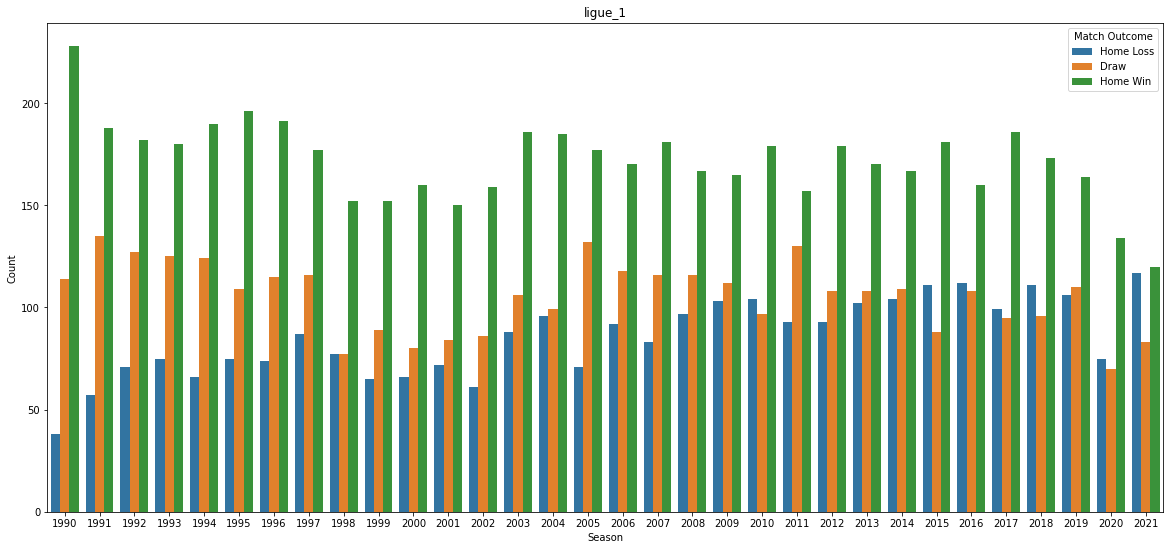

In [134]:
# Plot of match outcomes per season for each league
leagues = ['ligue_1','championship','eerste_divisie','ligue_2','premier_league','eredivisie','primera_division','primeira_liga','segunda_division','segunda_liga','serie_b','bundesliga','serie_a','2_liga']

league='ligue_1'

plt.figure(figsize=(20,9))
plt.title(league)

league_plot = sns.countplot(x='Season', data=full_results_table.loc[(full_results_table['League'] == league)], hue='Label')

league_plot.set(xlabel='Season', ylabel='Count')
plt.legend(title='Match Outcome', labels=['Home Loss', 'Draw', 'Home Win'])


In [132]:
full_results_table.loc[(full_results_table['League'] == 'ligue_1')]

,Home_Team,Away_Team,Result,Link,Season,Round,League,Home_Goals,Away_Goals,Label
0,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1,1,4,-1
1,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1,4,1,1
2,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1,3,0,1
3,Sporting Toulon Var,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1,2,0,1
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
11625,Lens,Lorient,4-1,https://www.besoccer.com/match/lens/lorient/20...,2021,32,ligue_1,4,1,1
11626,Nice,Stade de Reims,0-0,https://www.besoccer.com/match/nice/stade-reim...,2021,32,ligue_1,0,0,0
11627,Saint-Étienne,Girondins Bordeaux,4-1,https://www.besoccer.com/match/saint-etienne/b...,2021,32,ligue_1,4,1,1
11628,Monaco,Dijon FCO,3-0,https://www.besoccer.com/match/monaco/dijon-fc...,2021,32,ligue_1,3,0,1
